<a href="https://colab.research.google.com/github/hiteshmishra052/Big-Mart-Sales-Prediction/blob/main/InternshipProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/train_v9rqX0R.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
df.shape

(8523, 12)

* Item_Identifier -> Unique product ID
* Item_Weight -> Weight of product
* Item_Fat_Content -> Whether the product is low fat or not
* Item_Visibility -> The % of total display area of all products in a store allocated to the particular product
* Item_Type -> The category to which the product belongs
* Item_MRP -> Maximum Retail Price (list price) of the product
* Outlet_Identifier -> Unique store ID
* Outlet_Establishment_Year -> The year in which store was established
* Outlet_Size -> The size of the store in terms of ground area covered
* Outlet_Location_Type -> The type of city in which the store is located
* Outlet_Type -> Whether the outlet is just a grocery store or some sort of supermarket
* Item_Outlet_Sales -> Sales of the product in the particular store. This is the outcome variable to be predicted.

**Data Preprocessing**

In [29]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [31]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [32]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [33]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

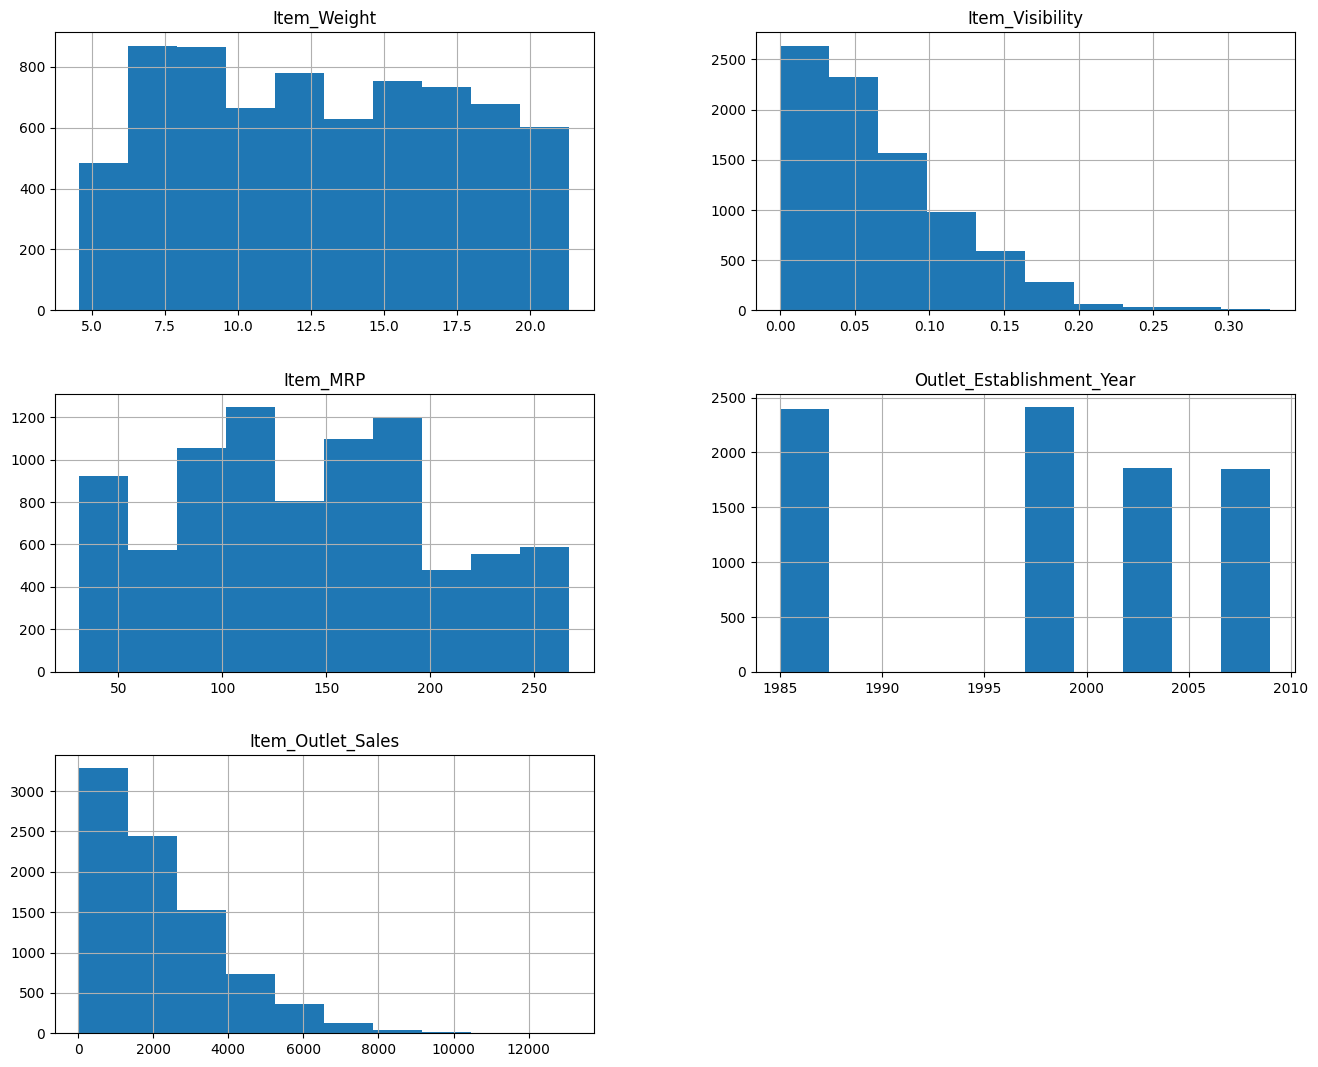

In [34]:
df.hist(figsize=(16,13))

In [35]:
#converting the non numeric values into nunmeric so that mean can be calculated
df['Outlet_Size'] = df['Outlet_Size'].map({"Small":1,"Medium":2,"High":3})
df[df['Outlet_Size']==1]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
11,FDA03,18.50,Regular,0.045464,Dairy,144.1102,OUT046,1997,1.0,Tier 1,Supermarket Type1,2187.1530
13,FDS46,17.60,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,1.0,Tier 1,Supermarket Type1,2145.2076
15,FDP49,9.00,Regular,0.069089,Breakfast,56.3614,OUT046,1997,1.0,Tier 1,Supermarket Type1,1547.3192
19,FDU02,13.35,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,1.0,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.60,Low Fat,0.025698,Household,196.5084,OUT035,2004,1.0,Tier 2,Supermarket Type1,1587.2672
...,...,...,...,...,...,...,...,...,...,...,...,...
8510,FDN58,13.80,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,1.0,Tier 2,Supermarket Type1,7182.6504
8513,FDH31,12.00,Regular,0.020407,Meat,99.9042,OUT035,2004,1.0,Tier 2,Supermarket Type1,595.2252
8517,FDF53,20.75,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,1.0,Tier 1,Supermarket Type1,3608.6360
8520,NCJ29,10.60,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,1.0,Tier 2,Supermarket Type1,1193.1136


**Filling the null values**

In [36]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [37]:
#Filling the null valiues
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mean())

In [38]:
df['Item_Identifier'].value_counts

<bound method IndexOpsMixin.value_counts of 0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object>

In [39]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Tansformation

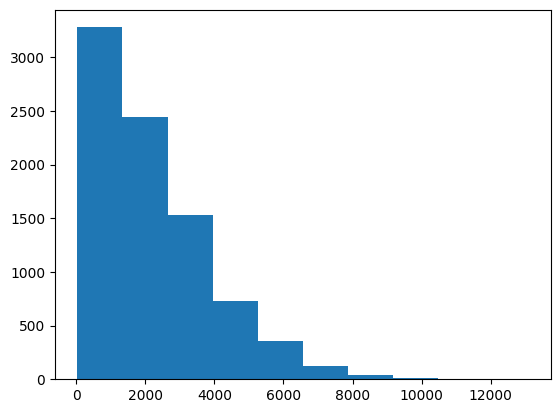

In [40]:
plt.hist(df['Item_Outlet_Sales'])
plt.show()

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

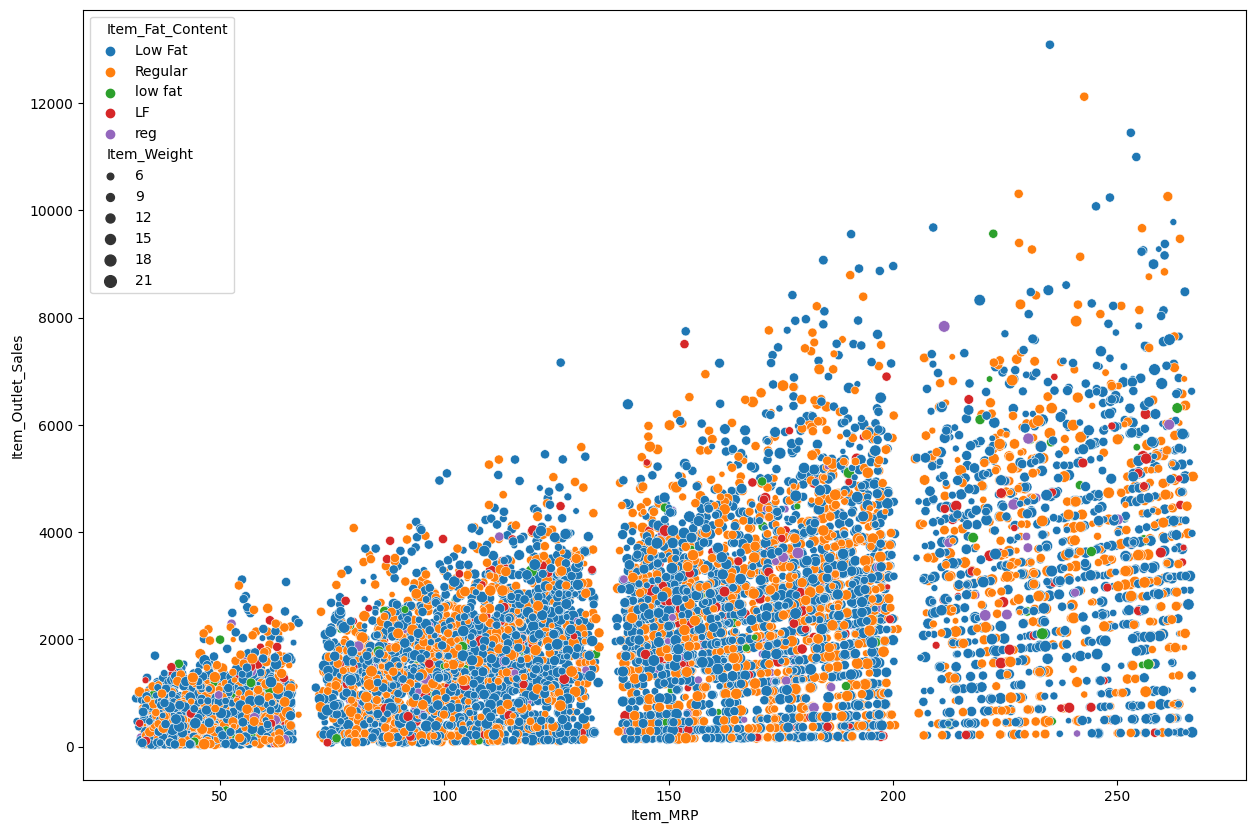

In [41]:
fig,axes=plt.subplots(1,1,figsize=(15,10))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [43]:
feat = ['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Fat_Content',"Item_Type"]
X = pd.get_dummies(df[feat])
df = pd.concat([df,X], axis = 1)

In [44]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2.000000,Tier 1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2.000000,Tier 3,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2.000000,Tier 1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1.761819,Tier 3,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,3.000000,Tier 3,...,0,0,0,1,0,0,0,0,0,0


In [45]:
df.drop(labels = ["Outlet_Size",'Outlet_Location_Type',"Outlet_Type",'Item_Fat_Content','Outlet_Identifier','Outlet_Establishment_Year','Item_Identifier',"Item_Type"],axis=1,inplace = True)

In [46]:
df.shape

(8523, 32)